In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

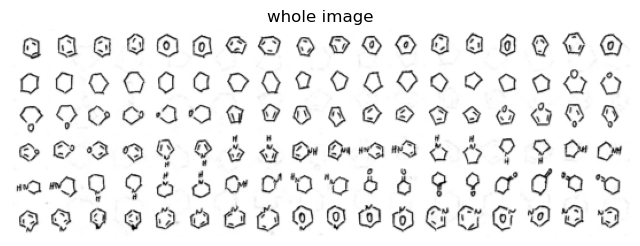

In [ ]:
whole_img = Image.open('./structures2.png')

def show(img, title, figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(label=title)
    plt.axis('off')

show(whole_img, 'whole image')

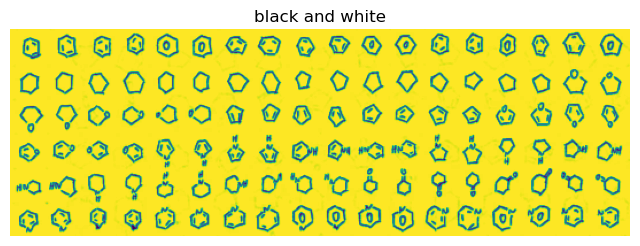

In [ ]:
# Convert to 8-bit b+w image

from PIL import ImageOps

bw_img = ImageOps.grayscale(whole_img)

show(bw_img, 'black and white')

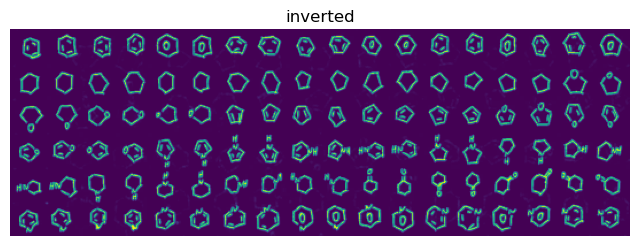

In [ ]:
# Invert colours

inv_img = ImageOps.invert(bw_img)

show(inv_img, 'inverted')

In [ ]:
# slice into individual images

img_size = 30

samples = []

for img, y in enumerate(range(0, inv_img.height, img_size)):
    cuts = []
    for x in range(0, inv_img.width, img_size):
        cut = inv_img.crop(box=(x, y, x+img_size, y+img_size))
        cuts.append(cut)
    samples.append(cuts)
print(f'cut {len(samples)*len(samples[0])} images')

cut 108 images


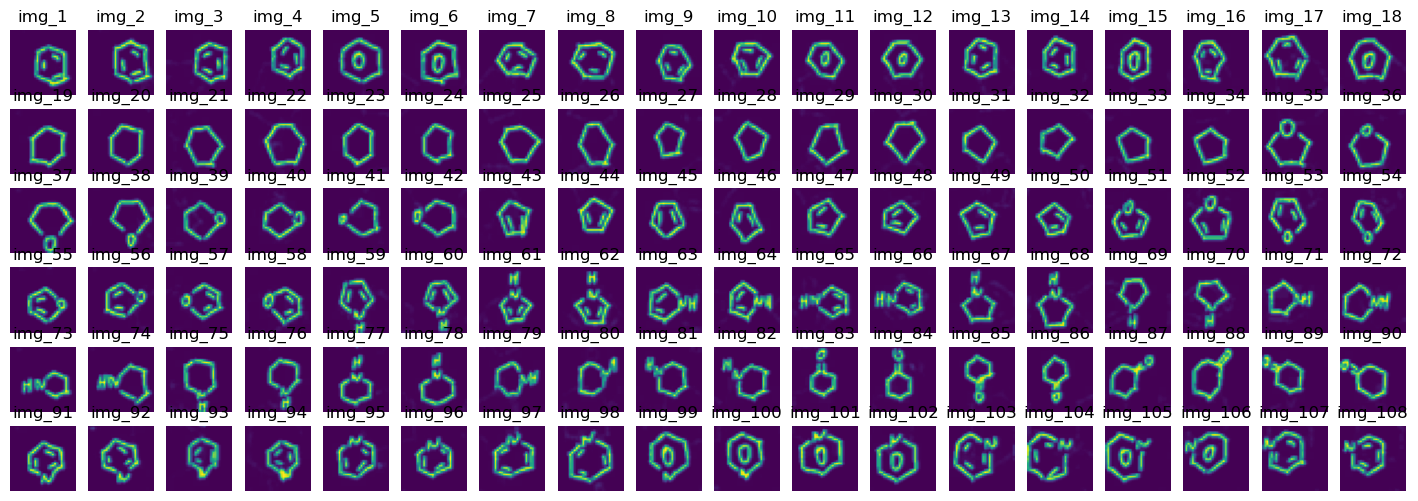

In [ ]:
# Visualise cut images
def show_all_images(samples):
    horiz = range(len(samples))
    vert = range(len(samples[0]))

    fig, ax = plt.subplots(6, 18, figsize=(18,6))

    for x in range(len(samples)):
        for y in range(len(samples[x])):
            sample = samples[x][y]
            ax[x][y].imshow(sample)
            ax[x][y].set_title(f'img_{18*x+y+1}')
            ax[x][y].axis('off')

    plt.show()

show_all_images(samples)

In [ ]:
# create list of image labels

labels = ['benzene', 'cyclohexane', 'cyclopentane', 'tetrahydrofuran',
          'cyclopentadiene', 'furan', 'pyrrole', 'pyrrolidine', 'piperidine',
          'cyclohexanone', 'pyridine']

amounts = [18, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18]

label_list = []

def add_labels(labels, amounts, label_list):
    for label, amount in zip(labels, amounts):
        for i in range(amount):
            label_list.append(label)
    return label_list


label_list = add_labels(labels, amounts, label_list)

print(label_list)

['benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'benzene', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclohexane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'cyclopentane', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'tetrahydrofuran', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'cyclopentadiene', 'furan', 'furan', 'furan', 'furan', 'furan', 'furan', 'furan', 'furan', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrole', 'pyrrolidine', 'pyrrolidine', 'pyrrolidine', 'pyrrolidine', 'pyrrolidine', 'pyrrolidine',

108


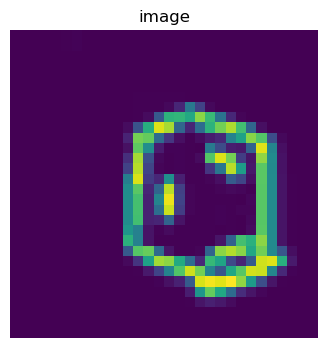

In [ ]:
# make list of images:

img_list = []

for row in samples:
    for img in row:
        img_list.append(img)

print(len(img_list))
show(img_list[0], 'image')

In [ ]:
# create dict of labels and images

labelled_imgs = {}


def update_labels_dict(img_list, label_list, dictionary):
    for i, label in zip(range(len(img_list)), label_list):
        dictionary[i] = label

update_labels_dict(img_list, label_list, labelled_imgs)

In [ ]:
# create 90, 180, and 270 deg rotational copies of each image

angles = [90, 180, 270]

rot_imgs = []
rot_labels = []

for img in img_list:
    rot_imgs.append(img)
    rot_labels.append(labelled_imgs[img_list.index(img)])
    for angle in angles:
        rot_img = img.rotate(angle)
        rot_imgs.append(rot_img)
        rot_labels.append(labelled_imgs[img_list.index(img)])

update_labels_dict(rot_imgs, rot_labels, labelled_imgs)

print(len(labelled_imgs))

432


In [ ]:
# create mirrored and flipped copies of each image

all_imgs = []
all_labels = []

for img in rot_imgs:
    flip_img = ImageOps.flip(img)
    mirr_img = ImageOps.mirror(img)
    imgs = [img, flip_img, mirr_img]
    for item in imgs:
        all_imgs.append(item)
        all_labels.append(labelled_imgs[rot_imgs.index(img)])

update_labels_dict(all_imgs, all_labels, labelled_imgs)

print(len(labelled_imgs))

1296


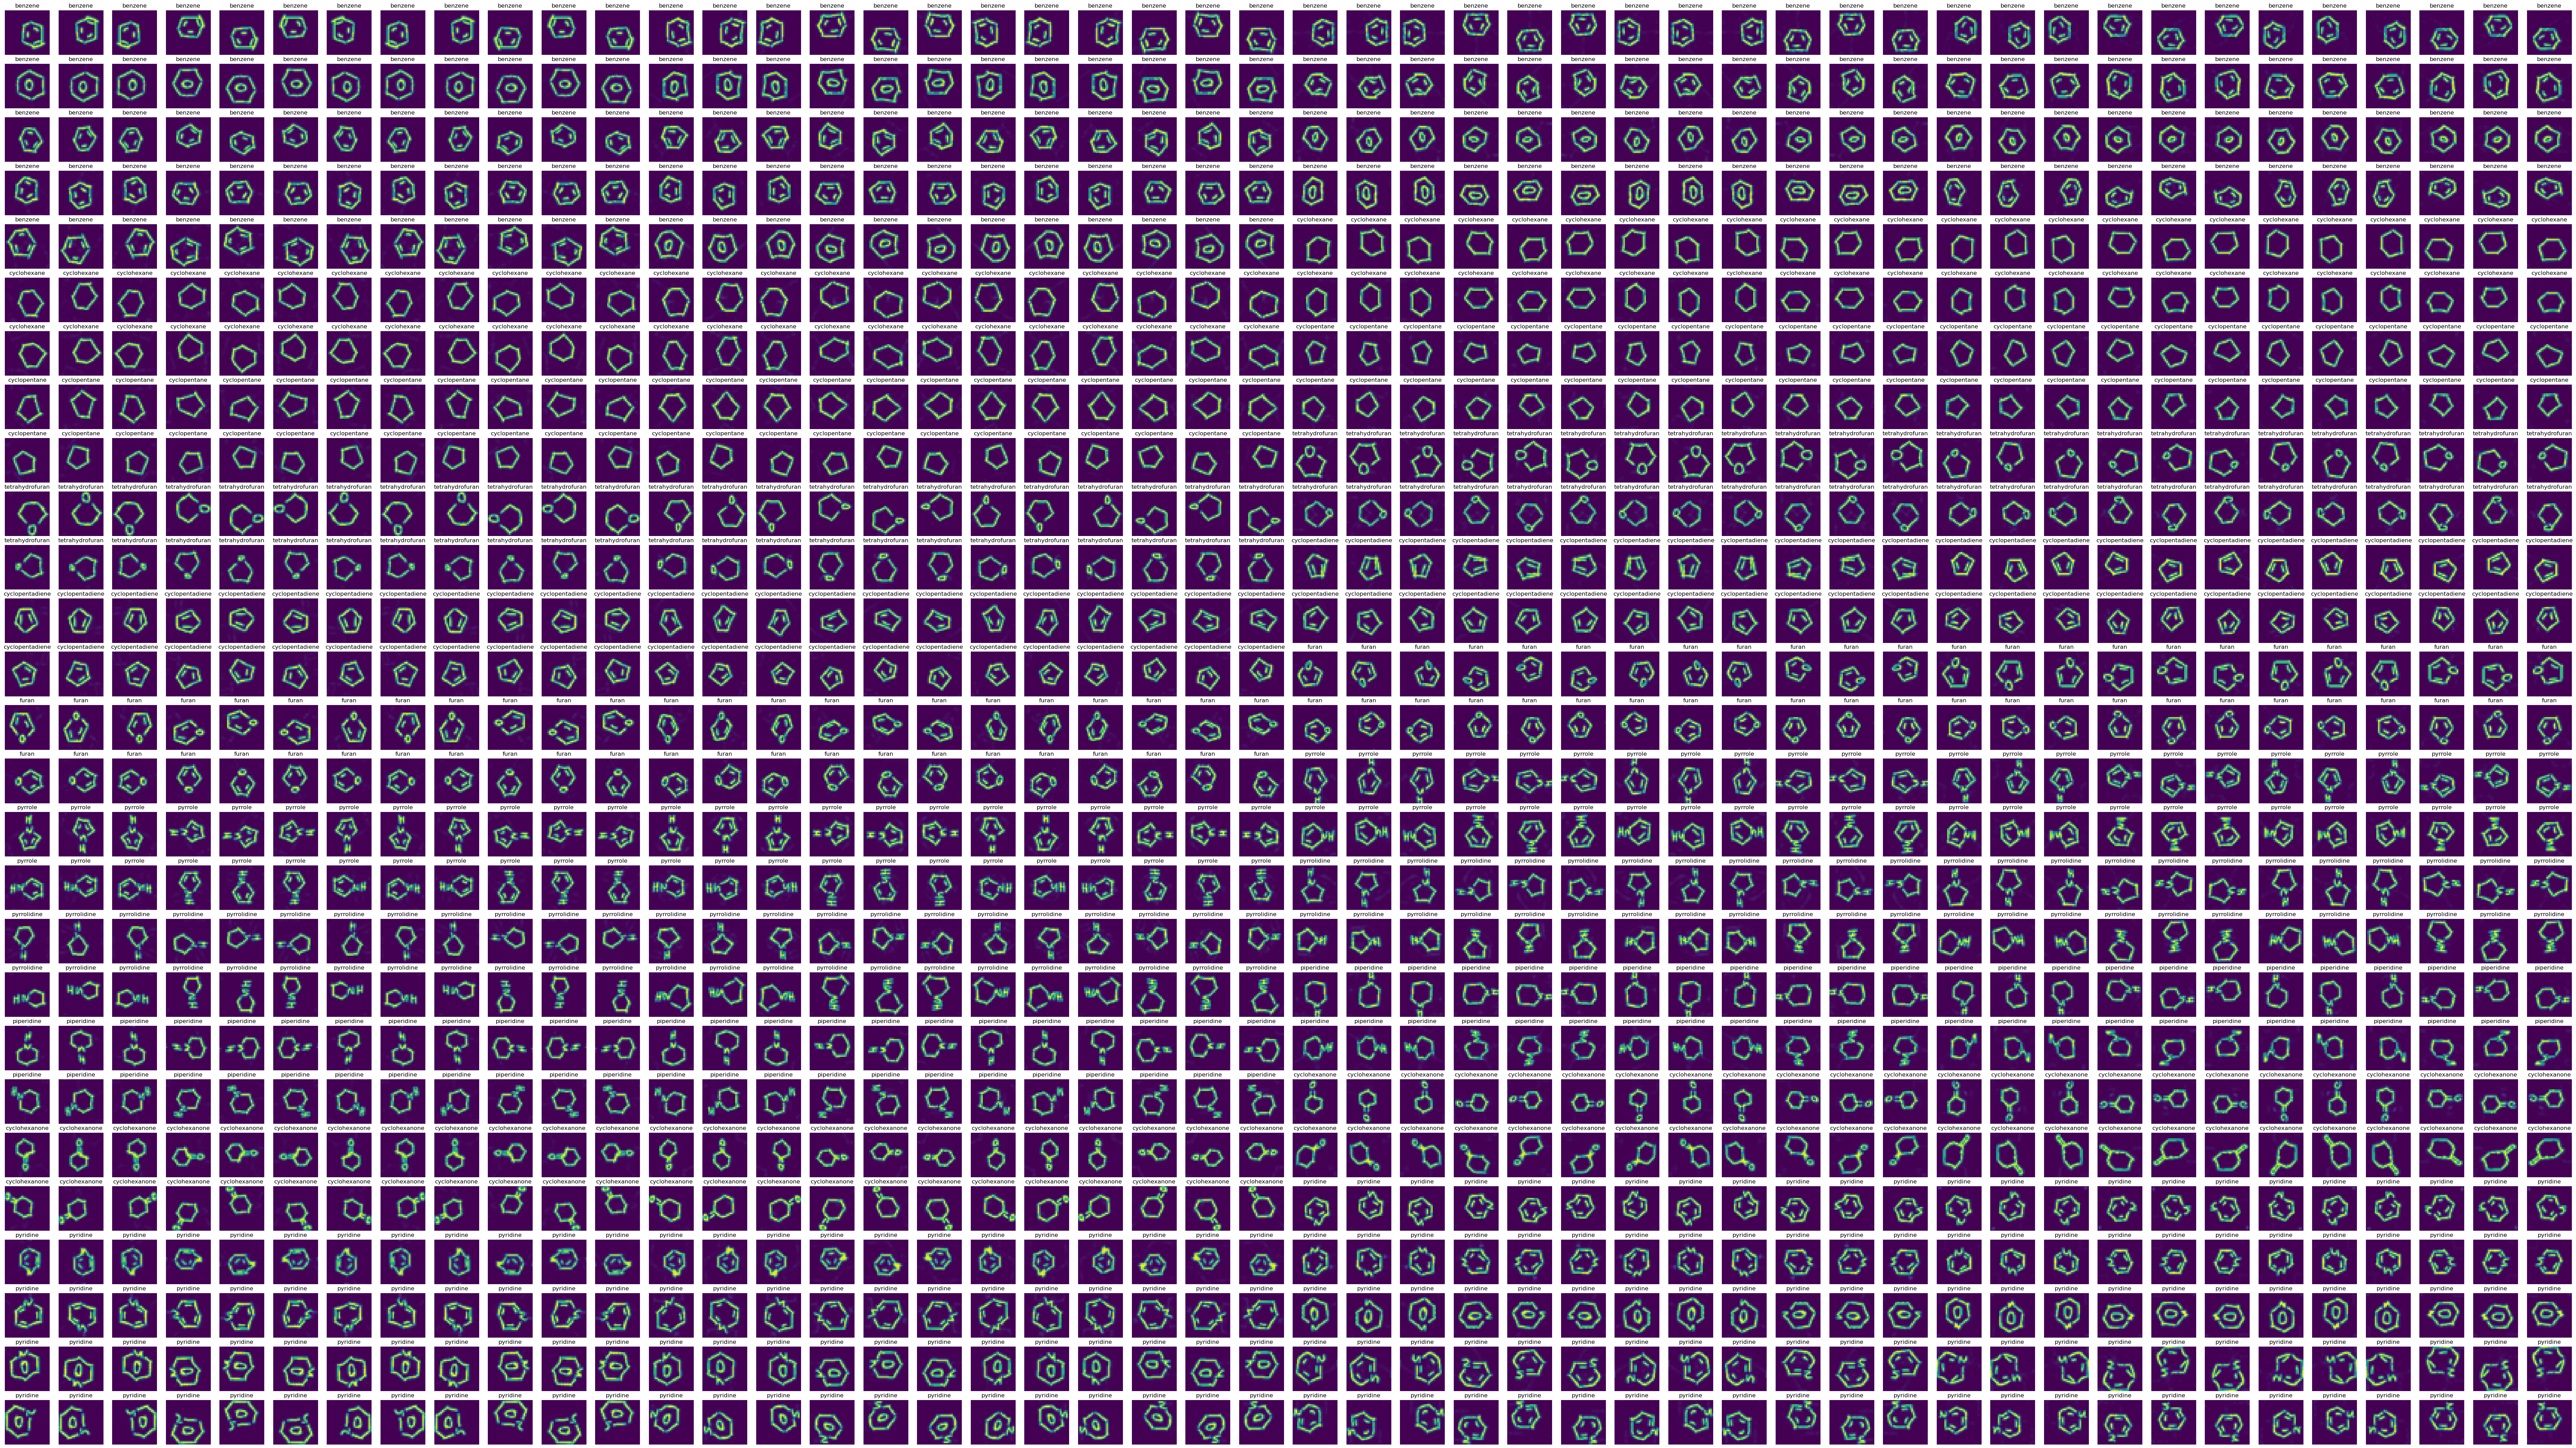

In [ ]:
# visualise entire image set

rows = 27
cols = 48

fig, ax = plt.subplots(rows, cols, figsize=(96, 54))

row_counter = 0
col_counter = 0

for img in all_imgs:

    title = labelled_imgs[all_imgs.index(img)]

    ax[row_counter][col_counter].imshow(img)
    ax[row_counter][col_counter].set_title(label=title)
    ax[row_counter][col_counter].axis('off')

    col_counter += 1
    if col_counter == cols:
        row_counter += 1
        col_counter = 0

plt.show()



inspection of the image indicates that the labelling strategy worked

In [ ]:
# create numpy array of final labels

labels = np.array(all_labels)

print(labels.shape)

(1296,)


In [ ]:
# create numpy arrays of image data

img_arrays = []

for img in all_imgs:
    arr = np.array([img.getdata()]).reshape(30, 30)
    img_arrays.append(arr)

print(img_arrays[0])
print(len(img_arrays))

[[  0   0   0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   5  26  96
   47   5   0   0   0   0   0   0   0   0   0   0]


In [ ]:
# save in numpy binary format

X_file = 'structures_X_test.npy'
Y_file = 'structures_Y_test.npy'

np.save(X_file, img_arrays)
np.save(Y_file, labels)

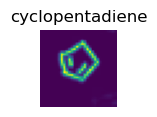

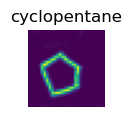

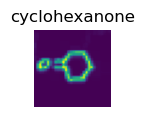

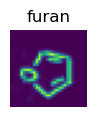

In [ ]:
# test

X_test = np.load(X_file)
Y_test = np.load(Y_file)

for i in np.random.randint(X_test.shape[0], size=4):
    show(X_test[i], title=f'{Y_test[i]}', figsize=(1,1))